# Minimum Resale Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import datetime

In [2]:
stock=pd.read_excel('min_resale.xlsx')

**fixing margin--wrong data**

In [3]:
stock['margin']=(stock['min_resale']-stock['price'])/stock['min_resale']

In [4]:
stock['submitted_date']=pd.to_datetime(stock['submitted_date'])
stock=stock.sort_values(by='submitted_date', ascending=True)

In [5]:
stock=stock[stock['submitted_date']>datetime.datetime(2021,4,2)]

In [6]:
stock['has_min_resale']='N'
stock.loc[~stock['min_resale'].isnull(), 'has_min_resale']='Y'
stock.head()

,seller_username,seller_id,buyer_username,buyer_id,item_id,title,brand_name,category_name,overall_grade,min_resale,price,margin,submitted_date,main_image,has_min_resale
4835,LoveLuxeBoutique,52950,Curateur,215874,2487896,Chanel Stamped Cc Sunburst Bracelet,Chanel,Bracelets,B,625.0,379.0,0.393600,2021-04-02 16:58:56,https://img.leprix.com/image/YDn7lB693Qg9ysThn...,Y
4833,LoveLuxeBoutique,52950,Curateur,215874,2487894,Chanel Vintage Small Coin Earrings,Chanel,Earrings,B,650.0,447.0,0.312308,2021-04-02 16:58:56,https://img.leprix.com/image/Nrz7O1VAnQdX1cIia...,Y
4828,BrandJFA_WS,210205,Everything But The House,216378,2487878,HERMES EARLY AMERICA Animal Motif Scarf Orange...,Hermès,Scarves/Wraps,A,NaN,187.0,NaN,2021-04-02 20:08:57,https://img.leprix.com/image/aiaWSRwMid37seWgv...,N
4498,camille+glt,199623,Everything But The House,216378,2485410,Louis Vuitton Strap Epi,Louis Vuitton,Small Accessories,B,NaN,166.0,NaN,2021-04-02 20:08:57,https://img.leprix.com/image/BgDr6BrWnb2bmoLeF...,N
4843,jeannette+dct-ep,202972,Everything But The House,216378,2502273,Louis Vuitton Set of 10 Name Tag Set Leather B...,Louis Vuitton,Small Accessories,B,NaN,161.0,NaN,2021-04-02 20:08:57,https://img.leprix.com/image/qBcSIm2TMp8MVQTkk...,N


In [7]:
stock['has_min_resale'].value_counts()

N    3555
Y    2564
Name: has_min_resale, dtype: int64

In [8]:
top5=list(stock['brand_name'].value_counts()[:5].index)

Top 5 Brands and whether or not minimum resale values were listed on items sold in 2021.

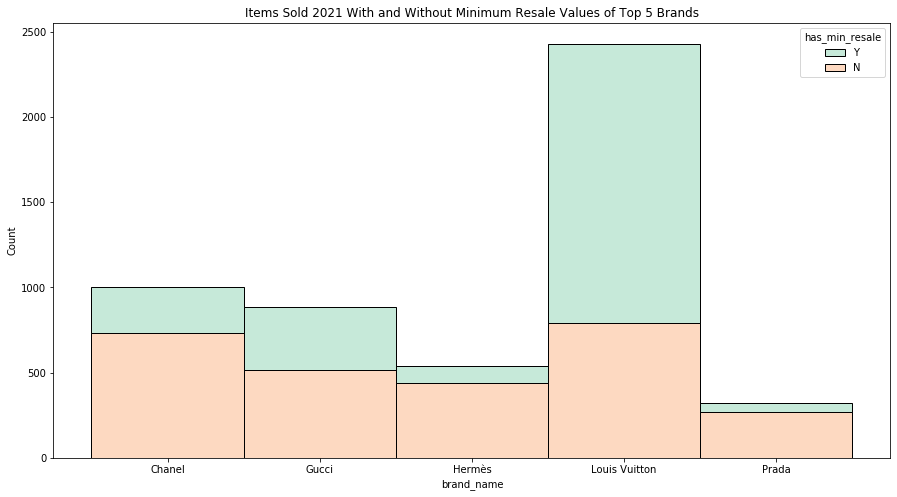

In [9]:

plt.figure(figsize=(15,8))
sns.histplot(x='brand_name', hue='has_min_resale',
             data=stock[stock['brand_name'].isin(top5)].sort_values(by='brand_name'), multiple='stack',
            palette='Pastel2', hue_order=['Y','N'])
plt.title('Items Sold 2021 With and Without Minimum Resale Values of Top 5 Brands')
plt.show()

In [10]:
(stock[stock['brand_name'].isin(top5)].sort_values(by='has_min_resale')
 .groupby('brand_name')['has_min_resale']
 .value_counts(normalize=True)*100)

brand_name     has_min_resale
Chanel         N                 73.000000
               Y                 27.000000
Gucci          N                 58.663647
               Y                 41.336353
Hermès         N                 81.632653
               Y                 18.367347
Louis Vuitton  Y                 67.476328
               N                 32.523672
Prada          N                 82.716049
               Y                 17.283951
Name: has_min_resale, dtype: float64

**set margin bins manually** **

In [11]:
stock['margin_lvl'] = pd.cut(stock['margin'],[-float('inf'),0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,float('inf')],
                             labels=['<0%','0-10%','11-20%','21-30%','31-40%', '41-50%', '51-60%',
                                     '61-70%', '71+%'])

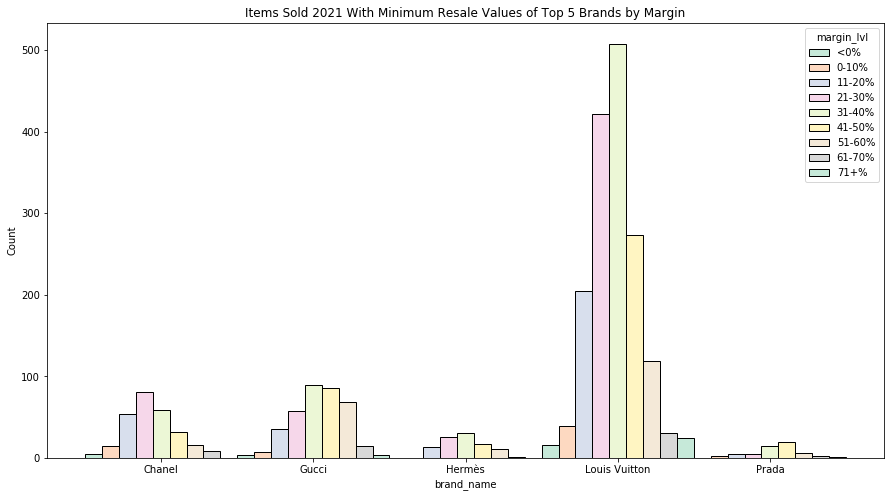

In [12]:
plt.figure(figsize=(15,8))
sns.histplot(x='brand_name', hue='margin_lvl',
             data=stock[stock['brand_name'].isin(top5)].sort_values(by='brand_name'),
             multiple='dodge', 
            palette='Pastel2')
plt.title('Items Sold 2021 With Minimum Resale Values of Top 5 Brands by Margin')
plt.show()

In [13]:
stock[stock['margin']<0].head()

,seller_username,seller_id,buyer_username,buyer_id,item_id,title,brand_name,category_name,overall_grade,min_resale,price,margin,submitted_date,main_image,has_min_resale,margin_lvl
5189,Camille+brandstreetTokyo,206687,Back On The Rack Gulfport,208798,2517983,LOUIS VUITTON Monogram Musette Tango Long Stra...,Louis Vuitton,Shoulder Bags,BC,625.00,699.0,-0.118400,2021-04-08 18:36:18,https://img.leprix.com/image/6C6zoOerkCQnliKBW...,Y,<0%
4996,Next Innovation,198548,Nesly.M,199122,2514251,Chanel Caviar Medallion Tote Pink,Chanel,Totes,BC,1320.00,1374.0,-0.040909,2021-04-12 09:58:00,https://img.leprix.com/image/zTR3bveQUf4Xu31qg...,Y,<0%
5538,RS_JapanWholesale,215421,The RealReal,200963,2557491,Chanel Caviar Large Coco Chain Tote Bag Black ...,Chanel,Totes,B,1870.00,2045.0,-0.093583,2021-04-19 18:52:14,https://img.leprix.com/image/z2ENBc2etxJdSe2mJ...,Y,<0%
6348,Next Innovation,198548,Bag Borrow Steal,188669,2607168,Louis Vuitton Damier Azur Saleya PM,Louis Vuitton,Totes,BC,8.95,646.0,-71.178771,2021-04-27 14:59:21,https://img.leprix.com/image/vHQZvwliybbUQWxOs...,Y,<0%
6260,BrandOff,202899,Divine Consign,199611,2606665,LOUIS VUITTON Tivoli GM Handbag Monogram,Louis Vuitton,Top Handles & Satchels,B,950.00,951.0,-0.001053,2021-04-27 22:35:14,https://img.leprix.com/image/RZ58Ni12gF9K0WHzw...,Y,<0%


In [15]:
merch=pd.read_excel('merch_resale.xlsx')

In [16]:
merch=merch.rename(columns={'date(si.created_at)':'created_at',
                            'date(si.deleted_at)':'deleted_at'})

In [18]:
merch['has_min_resale']='N'
merch.loc[(~merch['resale_price'].isnull())&(merch['resale_price']!=0),
            'has_min_resale']='Y'

In [31]:
merch['margin']=(merch['resale_price']-merch['b2b_price'])/merch['resale_price']

In [32]:
merch['margin_lvl'] = pd.cut(merch['margin'],[-float('inf'),0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,float('inf')],
                             labels=['<0%','0-10%','11-20%','21-30%','31-40%', '41-50%', '51-60%',
                                     '61-70%', '71+%'])

In [33]:
merch['has_min_resale'].value_counts().sort_index(ascending=True)

N    57235
Y    21436
Name: has_min_resale, dtype: int64

In [34]:
stock['has_min_resale'].value_counts()

N    3555
Y    2564
Name: has_min_resale, dtype: int64

In [35]:
st=(stock['has_min_resale'].value_counts()
 /merch['has_min_resale'].value_counts().sort_index(ascending=True))*100
st

N     6.211234
Y    11.961187
Name: has_min_resale, dtype: float64

In [23]:
(print('sellthrough rate for items WITHOUT resale prices from 4/2/2021-7/22/2021: {:.2f}%'
       .format(st[0])))
(print('sellthrough rate for items WITH resale prices from 4/2/2021-7/22/2021: {:.2f}%'
       .format(st[1])))

sellthrough rate for items WITHOUT resale prices from 4/2/2021-7/22/2021: 6.21%
sellthrough rate for items WITH resale prices from 4/2/2021-7/22/2021: 11.96%


In [27]:
total_st=len(stock)/len(merch)*100

In [28]:
(print('total sellthrough rate from 4/2/2021-7/22/2021: {:.2f}%'
       .format(total_st)))

total sellthrough rate from 4/2/2021-7/22/2021: 7.78%


In [38]:
merch['margin_lvl'].value_counts().sort_index()

<0%       3785
0-10%     2641
11-20%    3815
21-30%    4318
31-40%    3567
41-50%    2170
51-60%     826
61-70%     227
71+%        87
Name: margin_lvl, dtype: int64

In [63]:
# sell through by margin level
print('sellthrough by margin level (%)')
(stock['margin_lvl'].value_counts().sort_index()
 /merch['margin_lvl'].value_counts().sort_index())*100

sellthrough by margin level (%)


<0%        0.686922
0-10%      2.839833
11-20%     8.466579
21-30%    14.335340
31-40%    20.885899
41-50%    21.013825
51-60%    27.845036
61-70%    26.431718
71+%      34.482759
Name: margin_lvl, dtype: float64

In [64]:
# manually sorting brand name
merch['title']=merch['title'].str.lower()
(merch.loc[(~merch['title'].isnull())&
    (merch['title'].str.contains('louis vuitton')),'brand_name'])='Louis Vuitton'
(merch.loc[(~merch['title'].isnull())&
    (merch['title'].str.contains('chanel')),'brand_name'])='Chanel'
(merch.loc[(~merch['title'].isnull())&
    (merch['title'].str.contains('gucci')),'brand_name'])='Gucci'
(merch.loc[(~merch['title'].isnull())&
    (merch['title'].str.contains('hermes')),'brand_name'])='Hermès'
(merch.loc[(~merch['title'].isnull())&
    (merch['title'].str.contains('prada')),'brand_name'])='Prada'

In [65]:
# sellthrough by brand
print('sellthrough by brand (%)')
stock['brand_name'].value_counts()[:5]/merch['brand_name'].value_counts()*100

sellthrough by brand (%)


Louis Vuitton     7.770313
Chanel           10.617966
Gucci            11.537959
Hermès            8.769932
Prada             9.358752
Name: brand_name, dtype: float64

In [71]:
sold_by_brand=(stock[stock['brand_name'].isin(top5)]
 .groupby('brand_name')['has_min_resale'].value_counts().sort_index())

In [72]:
merch_by_brand=(merch.groupby('brand_name')['has_min_resale'].value_counts().sort_index())

In [75]:
# sellthrough by brand and min resale (y/n)
print('sell through by brand and inclusion of min resale value')
(sold_by_brand/merch_by_brand)*100

sell through by brand and inclusion of min resale value


brand_name     has_min_resale
Chanel         N                  9.586343
               Y                 14.975042
Gucci          N                  8.806528
               Y                 20.609825
Hermès         N                  7.640215
               Y                 25.581395
Louis Vuitton  N                  5.210051
               Y                 10.182021
Prada          N                  8.021550
               Y                 46.280992
Name: has_min_resale, dtype: float64

In [77]:
merch_by_brand

brand_name     has_min_resale
Chanel         N                  7615
               Y                  1803
Gucci          N                  5882
               Y                  1771
Hermès         N                  5759
               Y                   387
Louis Vuitton  N                 15163
               Y                 16097
Prada          N                  3341
               Y                   121
Name: has_min_resale, dtype: int64

In [83]:
sold_by_brand

brand_name     has_min_resale
Chanel         N                  730
               Y                  270
Gucci          N                  518
               Y                  365
Hermès         N                  440
               Y                   99
Louis Vuitton  N                  790
               Y                 1639
Prada          N                  268
               Y                   56
Name: has_min_resale, dtype: int64